In [1]:
import pandas as pd
from data import load_database_train
from plotter import plot_all_readings
from preprocessing import InterpolateRawData
import pandas as pd
%matplotlib inline

# Dados de treino

In [2]:
database_train = load_database_train()
print(database_train.__dict__.keys())

dict_keys(['datalist', 'datadict', 'X', 'y', 'cv_author', 'label_encoder', 'ones_encoder', 'y_encoded'])


In [3]:
df = pd.DataFrame(data=database_train.datadict)
pd.set_option('display.max_rows', None)
df

,spell,author,device,date,acc_data,gyr_data,time
0,ALOHOMORA,ANDERSON,SAMSUNG_A5,2020-07-27 10:04:23.717944,252,252,1271.355746
1,INCENDIO,YURI,SAMSUNG_NOTE_10,2020-07-26 21:27:30.895970,1593,1593,3183.623543
2,ALOHOMORA,HEITOR,MOTO_X,2020-07-27 09:27:20.636773,467,467,2257.385254
3,INCENDIO,GUILHERME,SAMSUNG_S8,2020-07-27 21:13:23.326184,1819,1819,3638.455442
4,FINITE_INCANTATEM,ANDERSON,SAMSUNG_A5,2020-07-27 10:05:44.270674,247,247,1247.520790
5,FINITE_INCANTATEM,DIEGO,MOTO_G5S_PLUS,2020-07-27 21:15:36.605755,296,296,1429.016113
6,FINITE_INCANTATEM,ANDERSON,SAMSUNG_A5,2020-07-27 10:05:51.438983,317,317,1592.590631
7,INCENDIO,HEITOR,MOTO_X,2020-07-27 09:31:55.488731,303,303,1462.951660
8,FINITE_INCANTATEM,HEITOR,MOTO_X,2020-07-27 09:30:45.198846,310,310,1496.856690
9,FINITE_INCANTATEM,GUILHERME,SAMSUNG_S8,2020-07-27 21:10:52.197677,1787,1787,3574.447557


In [4]:
df.groupby(['author', 'spell']).size()

author     spell             
ANDERSON   ALOHOMORA             20
           ARRESTO_MOMENTUM      20
           FINITE_INCANTATEM     20
           INCENDIO              20
           REVELIO               20
           WINGARDIUM_LEVIOSA    20
DIEGO      ALOHOMORA             20
           ARRESTO_MOMENTUM      18
           FINITE_INCANTATEM     20
           INCENDIO              20
           REVELIO               20
           WINGARDIUM_LEVIOSA    20
GUILHERME  ALOHOMORA             20
           ARRESTO_MOMENTUM      20
           FINITE_INCANTATEM     20
           INCENDIO              20
           REVELIO               20
           WINGARDIUM_LEVIOSA    20
HEITOR     ALOHOMORA             20
           ARRESTO_MOMENTUM      20
           FINITE_INCANTATEM     20
           INCENDIO              20
           REVELIO               20
           WINGARDIUM_LEVIOSA    20
YURI       ALOHOMORA             20
           ARRESTO_MOMENTUM      20
           FINITE_INCANTATEM     2

In [5]:
df.sort_values('time')

,spell,author,device,date,acc_data,gyr_data,time
255,WINGARDIUM_LEVIOSA,ANDERSON,SAMSUNG_A5,2020-07-27 09:54:17.860105,207,207,1049.664489
418,ARRESTO_MOMENTUM,YURI,SAMSUNG_NOTE_10,2020-07-26 21:22:03.196856,553,553,1103.867750
457,WINGARDIUM_LEVIOSA,ANDERSON,SAMSUNG_A5,2020-07-27 09:55:10.368367,221,221,1119.231221
539,WINGARDIUM_LEVIOSA,ANDERSON,SAMSUNG_A5,2020-07-27 09:54:39.735411,223,223,1128.469319
31,WINGARDIUM_LEVIOSA,ANDERSON,SAMSUNG_A5,2020-07-27 09:55:06.125662,225,225,1134.372570
242,WINGARDIUM_LEVIOSA,ANDERSON,SAMSUNG_A5,2020-07-27 09:55:28.745188,227,227,1145.101746
202,WINGARDIUM_LEVIOSA,ANDERSON,SAMSUNG_A5,2020-07-27 09:55:47.158831,227,227,1154.956887
226,ALOHOMORA,ANDERSON,SAMSUNG_A5,2020-07-27 10:04:26.838803,231,231,1167.351746
344,WINGARDIUM_LEVIOSA,ANDERSON,SAMSUNG_A5,2020-07-27 09:54:34.167558,231,231,1170.515977
550,FINITE_INCANTATEM,YURI,SAMSUNG_NOTE_10,2020-07-26 21:24:13.399356,590,590,1177.856268


### Exemplo de dado com gráfico

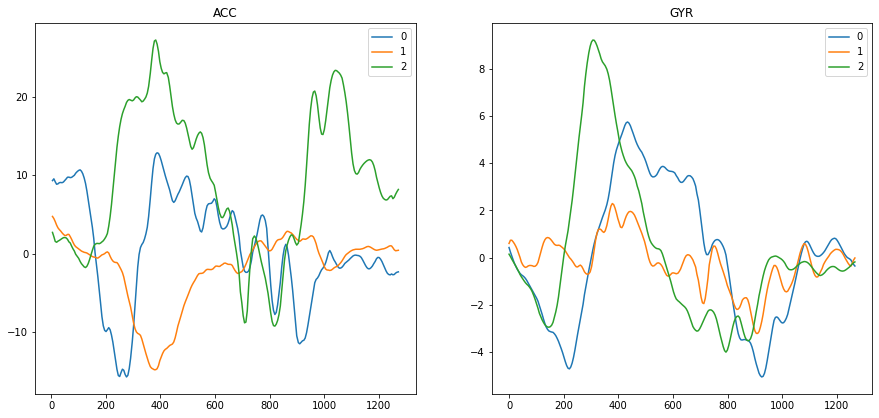

In [6]:
plot_all_readings(database_train.datalist[0].readings, table_format=(0, 2))

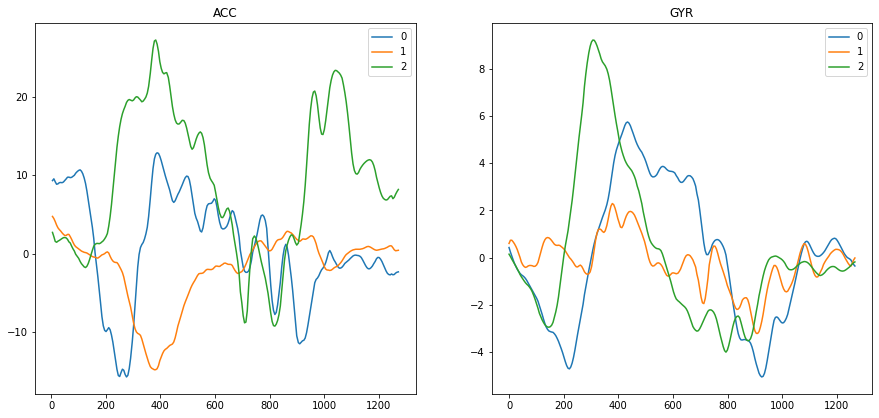

In [7]:
plot_all_readings(database_train.datalist[0].readings, table_format=(0, 2))

In [8]:
database_train.datalist[0].readings

{'ACC': array([[ 5.46370801e+00,  9.33978100e+00,  4.76206730e+00,
          2.72220730e+00],
        [ 1.04687080e+01,  9.56723000e+00,  4.49152230e+00,
          2.17872360e+00],
        [ 1.54737080e+01,  9.18655200e+00,  4.10605570e+00,
          1.57059630e+00],
        ...,
        [ 1.26140675e+03, -2.47321030e+00,  3.75889660e-01,
          7.60398500e+00],
        [ 1.26635075e+03, -2.36547140e+00,  4.07014280e-01,
          7.93199000e+00],
        [ 1.27135575e+03, -2.31998130e+00,  4.38138900e-01,
          8.20971800e+00]]),
 'GYR': array([[ 0.00000000e+00,  4.28216550e-01,  6.01702300e-01,
          1.46607650e-01],
        [ 5.00500000e+00,  2.37626580e-01,  7.37314340e-01,
          4.94800840e-02],
        [ 1.00100000e+01,  6.47517140e-02,  7.39146950e-01,
         -6.16973900e-02],
        ...,
        [ 1.25604200e+03, -1.88757360e-01, -2.46178690e-01,
         -2.71224170e-01],
        [ 1.26098600e+03, -2.87717520e-01, -1.05068825e-01,
         -2.20522360e-01],
 

# Processamento de dados para o modelagem

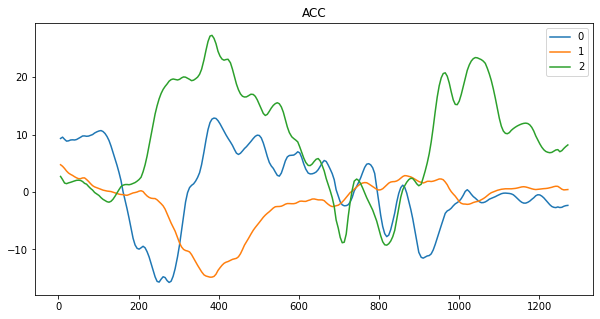

In [9]:
plot_all_readings(database_train.datalist[0].readings, keys=['ACC'], table_format=(1, 1), figsize=(10, 5))

### Modos de interpolação

<AxesSubplot:title={'center':'Gráfico do acelerometro interpolada em timesteps equidistantes'}>

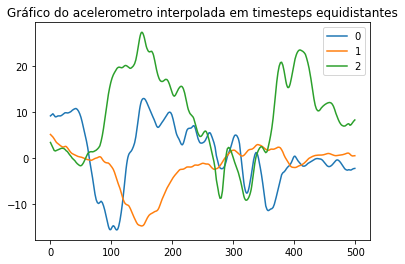

In [10]:
X = InterpolateRawData(num_samples=500, flatten_data=False, features_name=["ACC"]).fit_transform(database_train.X)
df = pd.DataFrame(data=X[0])
df.plot(title="Gráfico do acelerometro interpolada em timesteps equidistantes")

<AxesSubplot:title={'center':'Gráfico do acelerometro interpolada em timesteps equidistantes flatten'}>

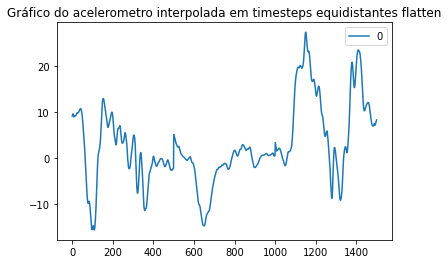

In [11]:
import numpy as np
X = InterpolateRawData(num_samples=500, flatten_data=True, features_name=["ACC"]).fit_transform(database_train.X)
df = pd.DataFrame(data=X[0])
df.plot(title="Gráfico do acelerometro interpolada em timesteps equidistantes flatten")

<AxesSubplot:title={'center':'Gráfico com tempo maximo 6s e timestep de 10ms'}>

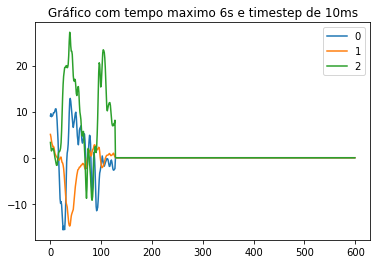

In [12]:
import numpy as np
X = InterpolateRawData(num_samples=None, timestep=10, max_time=6000, 
                       flatten_data=False, features_name=["ACC"]).fit_transform(database_train.X)
df = pd.DataFrame(data=X[0])
df.plot(title="Gráfico com tempo maximo 6s e timestep de 10ms")

<AxesSubplot:title={'center':'Gráfico com tempo maximo 6s e timestep de 10ms flaten'}>

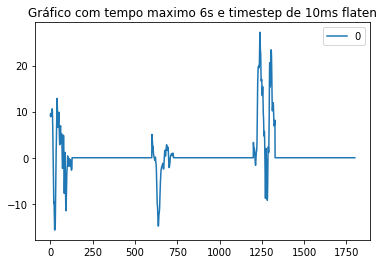

In [13]:
import numpy as np
X = InterpolateRawData(num_samples=None, timestep=10, max_time=6000, 
                       flatten_data=True, features_name=["ACC"]).fit_transform(database_train.X)
df = pd.DataFrame(data=X[0])
df.plot(title="Gráfico com tempo maximo 6s e timestep de 10ms flaten")